# Assignment \# III: Ridge & LASSO Regression

## Problem statement

The training set ($\texttt{crime-train.csv}$) consists of statistics of local crime for 1,595 communities. Our goal is to estimate the crime rate ($\texttt{ViolentCrimesPerPop}$) using 95 features, including the size of the police force or the percentage of children that graduate high school. Detailed descriptions of the features are avaialbe at the following website: http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names.

Let's estimate regression models using training samples to predict the crime rate, and evaluate them on the test set ($\texttt{crime-test.csv}$). To this end, suppose that the number of featrues and other statistics for the test set are exactly the same as those for the training set. 


**Note #1**:
You can use ```linalg.inv```, ```transpose```, ```dot```, ```sum```, ```concatenate```, ```min``` and ```max``` provided by ```Numpy```. Other mehtods (e.g., ```sklearn.linear_model``` or equivalent) should not be used. You will get no credit otherwise. 

**Note #2**: For handling the intercept term, refer the lecture note 5, page 46-53.  


**Note #3**: We will use **unnormalized features**. Please refer the lecture note 6, page 40-42.

### P1. Linear regression 

P1.1 Implement a linear regression method (```LinearRegressor``` class) using **a coordinate descent algorithm**, and estimate regression coefficients for features including a bias (intercept) term. (*20 points*) 

> **Convergence condition**: Stop the iteration if $||\hat w_t - \hat w_{t+1}||_\infty < \tau$, where $\hat w_t$  is estimated coefficients at time $t$. $t$ is a number of iteration, and $\tau (=10^{-3})$ is a tolerance. Note that the infinity norm of a vector ${\bf{x}}=(x_1,x_2,\dots,x_n)$ is defined as $||{\bf{x}}||_\infty = max(|x_1|,|x_2|,\dots,|x_n|)$.
>
> **Loss function**: RSS
>
> **Initialization**: Set all weight values (including the bias term) to random Gaussian with mean of 0 and standard deviation of 1 $\left( \mathcal{N}(0, 1) \right)$.
>
> Pick the next coordinate squentially (i.e., $0, 1, 2, \dots$).

P1.2 Plot prediction errors on training samples, over the number of iterations. Use the RSS as an error metric. (*5 points*) 

Since there are a considerable number of input variables, overfitting might occur, which prevents trained models from generalizing unseen test samples. 
Regularization techniques such as ridge and LASSO have proven useful for the overfitting problem.

### P2. Ridge regression 

P2.1  Implement a ridge regression method (```RidgeRegressor``` class which **inherits** from the ```LinearRegressor``` class in **P1**) using **a coordinate descent algorithm**, and estimate regression coefficients for features including a bias (intercept) term. Suppose that other conditions are the same as **P1**. (*20 points*)

P2.2 Plot prediction errors on training samples, over the number of iterations, for the model with the regularization parameter $\lambda$ being 5. Use the RSS as an error metric. (*5 points*)


### P3. Lasso regression 

P3.1 Implement a ridge regression method (```LassoRegressor``` class which **inherits** from the ```LinearRegressor``` class in **P1**) using **a coordinate descent algorithm**, and estimate regression coefficients for features including a bias (intercept) term. Suppose that other conditions are the same as **P1**. (*20 points*)


P3.2 Plot prediction errors on training samples, over the number of iterations, for the model with the regularization parameter $\lambda$ being 5. Use the RSS as an error metric. (*5 points*)

### P4. Analysis

P4.1 Run the code provided to plot magnitudes of estimated coefficients for each method. Analyze and contrast regression methods (linear regression without regularization, ridge regression, and lasso regression) in terms of the magnitudes of coefficients. *(5 points)*  

P4.2 Implement the ```stack_weight_over_lambda``` function that outputs a stack of regression coefficients for regularization parameters. Run the code provided to plot coefficient paths of given features over the regularization parameter. The parameter starts and ends from the values of 0 and 100, respectively, with the increment of 5. Analyze coefficient paths for ridge and lasso regression methods. *(5 points)* 

P4.3 Implement the ```get_number_of_non_zero``` function that counts the number of non-zero values for regression coefficients. Run the code provided, and analyze ridge and lasso regression methods in terms of the number of non-zero coefficients. *(5 points)*  

P4.4 Implement the ```compute_errors``` function that inputs a set of regression coefficients for different regularization parameters (obtained by the ```stack_weight_over_lambda``` function) and output the error (**RSS**) between predictions and target values. *(5 points)* 

P4.5 Run the code provided to plot training and test errors using the ```compute_errors``` function. Analyze results for linear regression without regularization, ridge regression, and lasso regression in terms of the prediction error. *(5 points)*  

## Results

In [ ]:
from copy import deepcopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from RidgeLasso import *


class Dataset:
    """
    Dataset class
    """
    
    def __init__(self, data_path):
        """
        Description:
            Load a csv file using 'load_data' method.
            Convert the dataframe to numpy array.
        
        Args:
            data_path (str): Path of the csv file.
                       
        Returns:
            
        """
        assert type(data_path)==str, 'The type of data_path has to be string'
        
        self.path = data_path
        self.features, self.data = self.load_data()
        self.min = None
        self.max = None        
                
    def load_data(self):
        """
        Description:
            Load the csv file.
            Print the head of data. 
        
        Args: 
            
            
        Returns:
            features (list): The names of the features.
            data (numpy array): Data.
        """
        dataframe = pd.read_csv(self.path)
        print(dataframe.head())
        features = list(dataframe)[:-1]
        data = dataframe.values
        return features, data

    def parse_data(self, features):
        """
        Description:
            Parse the data using 'features'.
            Add a bias to the data.
        
        Args:
            features (list): The names of feature we use.
        
        Returns:
            X (numpy array): Input data.
            y (numpy arary): Target (feature name: 'ViolentCrimesPerPop').
            
        """
        assert type(features)==list, 'The type of feature_names has to be list'
        assert all([isinstance(feature, str) for feature in features]), 'The element of features has to be string'
            
        data = deepcopy(self.data)
        indices = [self.features.index(feature) for feature in features]
        X = data[:, indices]
        y = data[:, -1]
        
        bias = np.ones([len(self.data), 1])
        X = np.concatenate((bias, X), axis=1)
        
        return X, y


### Instantiate the ```Dataset``` class

In [4]:
data_path = 'crime-train.csv'
dataset = Dataset(data_path)

   population  householdsize  agePct12t21  agePct12t29  agePct16t24  \
0       -0.45          -1.85        -1.06         0.67         0.08   
1       -0.45          -0.27        -0.22        -0.17        -0.34   
2       -0.14           1.87         0.55         0.04         0.02   
3       -0.38           0.53        -0.28        -0.79        -0.64   
4       -0.30          -1.12        -0.74        -0.10        -0.40   

   agePct65up  numbUrban  pctUrban  medIncome  pctWWage  ...  PctForeignBorn  \
0       -0.85      -0.34      0.68      -0.24      0.88  ...           -0.02   
1       -0.58      -0.50     -1.57      -0.29      0.12  ...           -0.33   
2       -1.19      -0.03      0.68       1.05      1.81  ...           -0.11   
3       -0.35      -0.34      0.46       0.66      0.88  ...           -0.46   
4       -0.30      -0.19      0.68       0.76      0.67  ...            2.10   

   PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  LandArea  \
0           

### Prepare training samples

In [5]:
X, y = dataset.parse_data(features=dataset.features)
print(f"shape of X: {X.shape}, shape of y: {y.shape}")

shape of X: (1595, 96), shape of y: (1595,)


In [6]:
X[3,:]

array([ 1.  , -0.38,  0.53, -0.28, -0.79, -0.64, -0.35, -0.34,  0.46,
        0.66,  0.88, -0.64,  1.04, -0.18, -0.94,  1.38,  0.43,  0.42,
        0.22, -0.06, -1.24,  2.14,  0.51, -0.43, -1.06, -0.31, -0.41,
       -0.15, -1.2 ,  0.86,  1.35, -0.35,  0.14,  0.1 , -1.32, -0.94,
       -1.64, -1.55,  0.14,  1.48,  1.4 ,  1.03,  1.39, -0.6 ,  0.42,
       -0.33, -0.83, -0.34, -1.32, -1.38, -0.99, -0.81, -0.73, -0.69,
       -0.61, -0.57,  0.41, -0.46, -0.55, -0.32,  0.75,  0.67, -0.18,
        1.66, -0.79, -1.77,  0.73, -0.44,  0.88,  1.73, -0.76,  0.62,
        1.01, -0.88, -0.5 ,  0.2 ,  0.2 ,  0.13,  0.24, -0.06, -0.17,
       -0.02, -1.59,  0.32, -1.01, -0.29, -0.23, -0.46,  0.54,  0.58,
       -0.08, -0.61, -0.23, -0.7 , -0.62, -0.39])

---

### Instantiate a linear regression model

In [7]:
least_square = LinearRegressor(tau=1e-3, dim=X.shape[1])

### P1.1

In [8]:
least_square.LR_with_coordinate_descent(X, y)
print(least_square.weight)

[ 2.36221267e-01 -5.17522720e-03 -3.32981324e-04  2.66364094e-03
 -3.45830069e-02 -2.92826667e-02  9.56380484e-03 -2.91579276e-02
  2.20093607e-02 -1.85724179e-02 -4.54093253e-02  6.54841849e-03
 -4.13424358e-02  9.89835948e-04 -2.01382613e-03 -1.01494644e-02
  4.79172588e-02 -6.50598259e-02  5.46998569e-03 -3.39353953e-04
 -3.34744493e-03  5.03107211e-03  1.11789688e-02  3.37485111e-02
 -4.43514597e-02 -1.73681207e-02  3.54922314e-03  1.52878258e-02
  3.46888256e-03  4.79676629e-02 -1.39664297e-02  3.04342798e-03
  2.18581688e-02  1.07198631e-02 -2.62948307e-01  6.35811959e-02
 -4.02559150e-01  6.43683238e-01 -8.50286258e-03  6.31368251e-02
 -1.35304050e-01 -8.73644044e-03 -2.88348986e-03  7.25237875e-03
 -3.17200062e-02 -2.19468767e-02  5.12898600e-02 -1.57250609e-02
  3.04425058e-03 -5.50977884e-03  6.57447742e-03 -7.14387436e-04
 -2.46734765e-02  4.90553114e-02 -7.27408132e-02  6.21589392e-02
 -2.18384767e-02 -5.78226798e-02 -1.26562277e-02 -9.03668253e-03
  1.99790675e-01 -1.30416

### P1.2

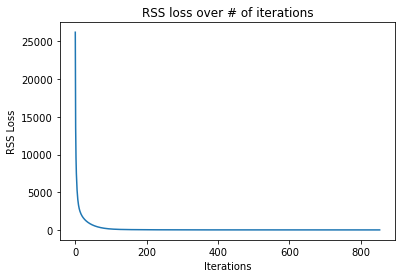

In [9]:
least_square.plot_loss_history()

---

### Instantiate a ridge regression model

In [10]:
ridge = RidgeRegressor(tau=1e-3, dim=X.shape[1], lambda_=5)

### P2.1

In [11]:
ridge.LR_with_coordinate_descent(X, y)
print(ridge.weight)

[ 2.36327367e-01 -1.25009305e-02  5.00685117e-03  1.48114248e-02
 -1.98083676e-02 -3.73257386e-02  1.93580647e-02 -1.22852733e-02
  1.93778053e-02  6.28037085e-02 -2.17743035e-02  5.81783728e-03
 -3.62105799e-02  1.09541754e-02 -4.51046117e-03 -1.07227670e-02
  5.22561577e-03 -7.64280995e-02  1.04946864e-02 -1.32955762e-03
 -3.61665213e-03  5.11052516e-03  1.18764400e-02  2.62433481e-02
 -2.60456348e-02 -1.41973826e-02  7.84755776e-03  9.36956966e-03
  4.99977451e-03  4.00082581e-02 -1.29651171e-02  4.42560269e-03
  1.76252038e-02  1.35535025e-02 -2.26225702e-02  3.96621912e-02
 -9.42124966e-02  1.10650978e-01 -8.85656714e-03 -5.77720470e-03
 -7.29958801e-02 -2.97494949e-03 -2.58579945e-03  8.73577396e-03
 -3.11867671e-02 -2.27367152e-02  5.49897197e-02 -1.55639334e-02
 -6.68501646e-03  2.24271249e-04  9.01489520e-03  2.04237239e-03
  3.04416284e-02 -1.11045500e-02 -7.27002296e-02  4.46287209e-02
 -7.53966226e-03 -5.12688690e-02  5.82784172e-03 -2.46295626e-02
  8.43933986e-02 -4.91533

### P2.2

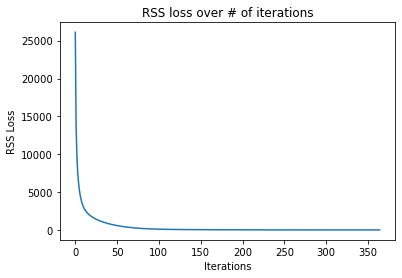

In [12]:
ridge.plot_loss_history()

---

### Instantiate a lasso regression model

In [13]:
lasso = LassoRegressor(tau=1e-3, dim=X.shape[1], lambda_=5)

### P3.1

In [14]:
lasso.LR_with_coordinate_descent(X, y)
print(lasso.weight)

[ 2.35794443e-01  0.00000000e+00  2.21686968e-03  0.00000000e+00
 -1.68896593e-02  0.00000000e+00  5.94800190e-03  0.00000000e+00
  1.56753747e-02  0.00000000e+00  0.00000000e+00  1.12616195e-04
 -1.98575074e-02  0.00000000e+00  0.00000000e+00 -7.29834873e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.14054198e-03  2.70038982e-03  8.12865704e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.95848456e-04  0.00000000e+00 -4.28732872e-03  3.19215613e-04
  0.00000000e+00  1.29574902e-03  8.91377751e-03  8.56128932e-04
  0.00000000e+00  0.00000000e+00  2.28165260e-03  0.00000000e+00
 -7.56173987e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.72022798e-03  0.00000000e+00  6.86196575e-02 -9.66723350e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.70248106e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.78167973e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

### P3.2

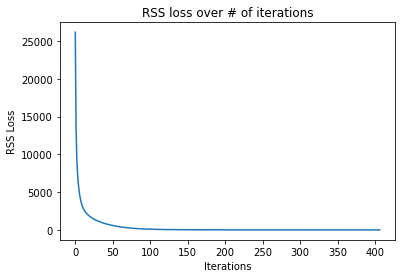

In [15]:
lasso.plot_loss_history()

---

### P4.1

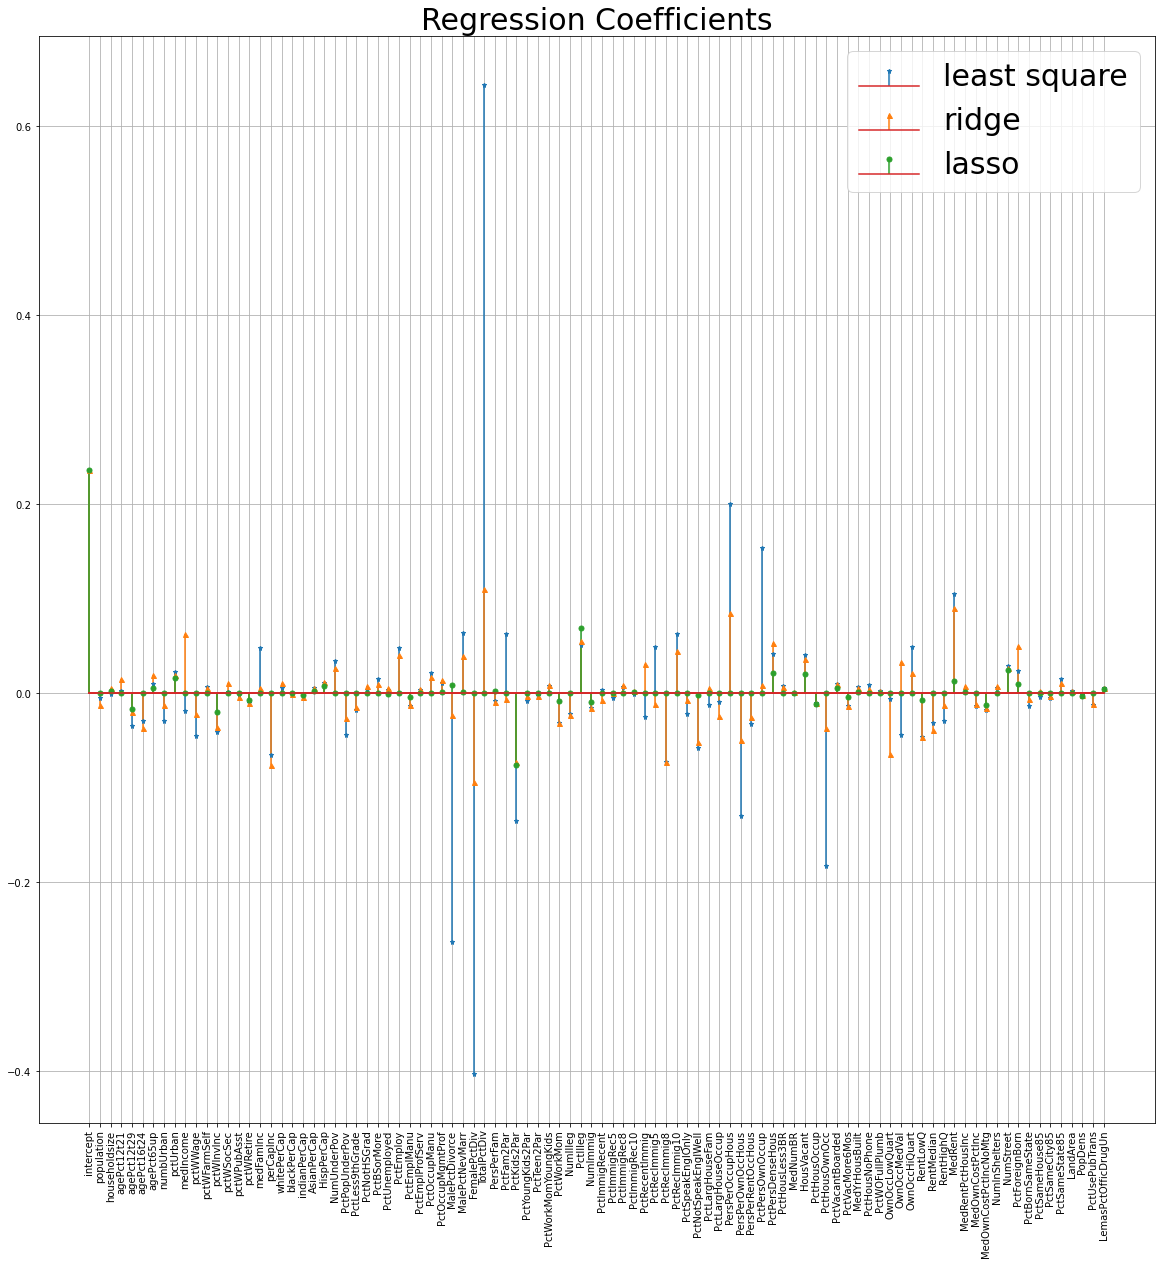

In [16]:
plt.figure(figsize=[20, 20])

markerline, stemlines, baseline = plt.stem(range(0, 96), least_square.weight, label='least square')
plt.setp(markerline, markersize=5, color='#1f77b4', marker='*')
plt.setp(stemlines, color=plt.getp(markerline, 'color'))
plt.setp(stemlines, linestyle='-')

markerline, stemlines, baseline = plt.stem(range(0, 96), ridge.weight, label='ridge')
plt.setp(markerline, markersize=5, color='#ff7f0e', marker='^')
plt.setp(stemlines, color=plt.getp(markerline,'color'))
plt.setp(stemlines, linestyle='-')

markerline, stemlines, baseline = plt.stem(range(0, 96), lasso.weight, label='lasso')
plt.setp(markerline, markersize=5, color='#2ca02c', marker='o')
plt.setp(stemlines, color=plt.getp(markerline,'color'))
plt.setp(stemlines, linestyle='-')

plt.xticks(range(0, 96), ['intercept']+dataset.features, rotation=90)
plt.title('Regression Coefficients', fontsize=30)

plt.grid()
plt.legend(fontsize=30)
plt.show()

First we can see that most weights get smaller in both Ridge and Rasso compared to least sqaure method. This is the desired result of using penalty terms. When models are overfitted to training data, they show relatively big weights. Since Ridge and Rasso methods each add L2 and L1 norms to their loss functions, they try to make smaller weights. Therefore, smaller weight coeffieicents are a proper result of using regularization temrs.
<p>We can also see that there are many weight coefficient terms that are 0 in Lasso regression, but none in Ridge Regression. For example, 6th term has 0 for Lasso but a negative number for Ridge. Including this, there are many green points on the horixontal axis, but no orange arrow on the axis. This tells us that Lasso Regression frequently makes weight coefficients exactly 0, compared to Ridge regression which only makes weights smaller.</p>
<p>There are some weights that have bigger value when regularization methods are used compared to the ones without using them. This means that not all weights get smaller. This may be because some terms have correlation to each other. As a result, when one term's weight is reduced because of regularization, the other was given more responsibility. As a result, some weights got bigger after using regularization terms in Ridge or Lasso regression. However, most weights got smaller.</p>
<p>Note a big line for the intercept. Since intercept having a big value does not mean that the model is overfitted, the intercept term should not be penalized. Therefore, the intercept term has big values even after adding regularization terms.</p>

---

### P4.2

In [17]:
def plot_regularization_paths(weights, lambda_list, model_type, features):
    assert model_type in ['Lasso', 'Ridge'], f"model_type must be 'Ridge' or 'Lasso' but were given {model_type}"
    indices = [dataset.features.index(feature) for feature in features]
    plt.figure(figsize=[30, 10])
    plt.plot(lambda_list, weights[:, indices], markersize=20, marker=(5,1))
    plt.title(f"Regularization paths of {model_type} regression", fontsize=30)
    plt.xlabel('$\lambda$', fontsize=30)
    plt.ylabel('weights', fontsize=30)
    plt.legend(features, fontsize=20, bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

In [18]:
lambda_list = np.array(range(0, 101, 5))
print(lambda_list)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100]


In [19]:
stacked_weight_ridge = stack_weight_over_lambda(X, y, 'Ridge', 1e-3, X.shape[1], lambda_list)

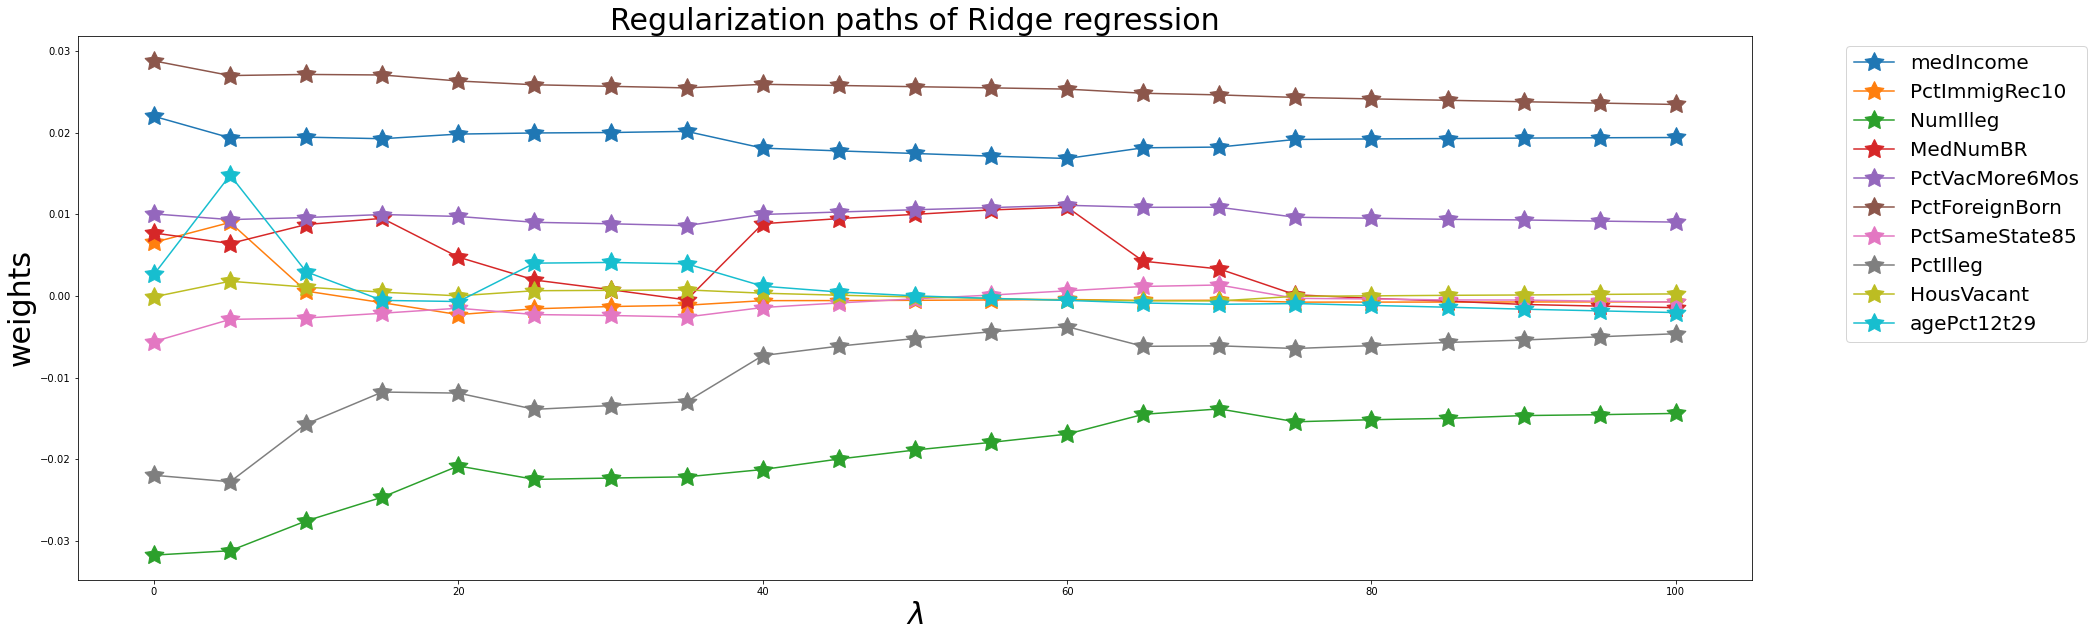

In [20]:
features = [
    'medIncome',
    'PctImmigRec10',
    'NumIlleg',
    'MedNumBR',
    'PctVacMore6Mos',
    'PctForeignBorn',
    'PctSameState85',
    'PctIlleg',
    'HousVacant',
    'agePct12t29'
]

plot_regularization_paths(stacked_weight_ridge, lambda_list, 'Ridge', features)

In [21]:
stacked_weight_lasso = stack_weight_over_lambda(X, y, 'Lasso', 1e-3, X.shape[1], lambda_list)

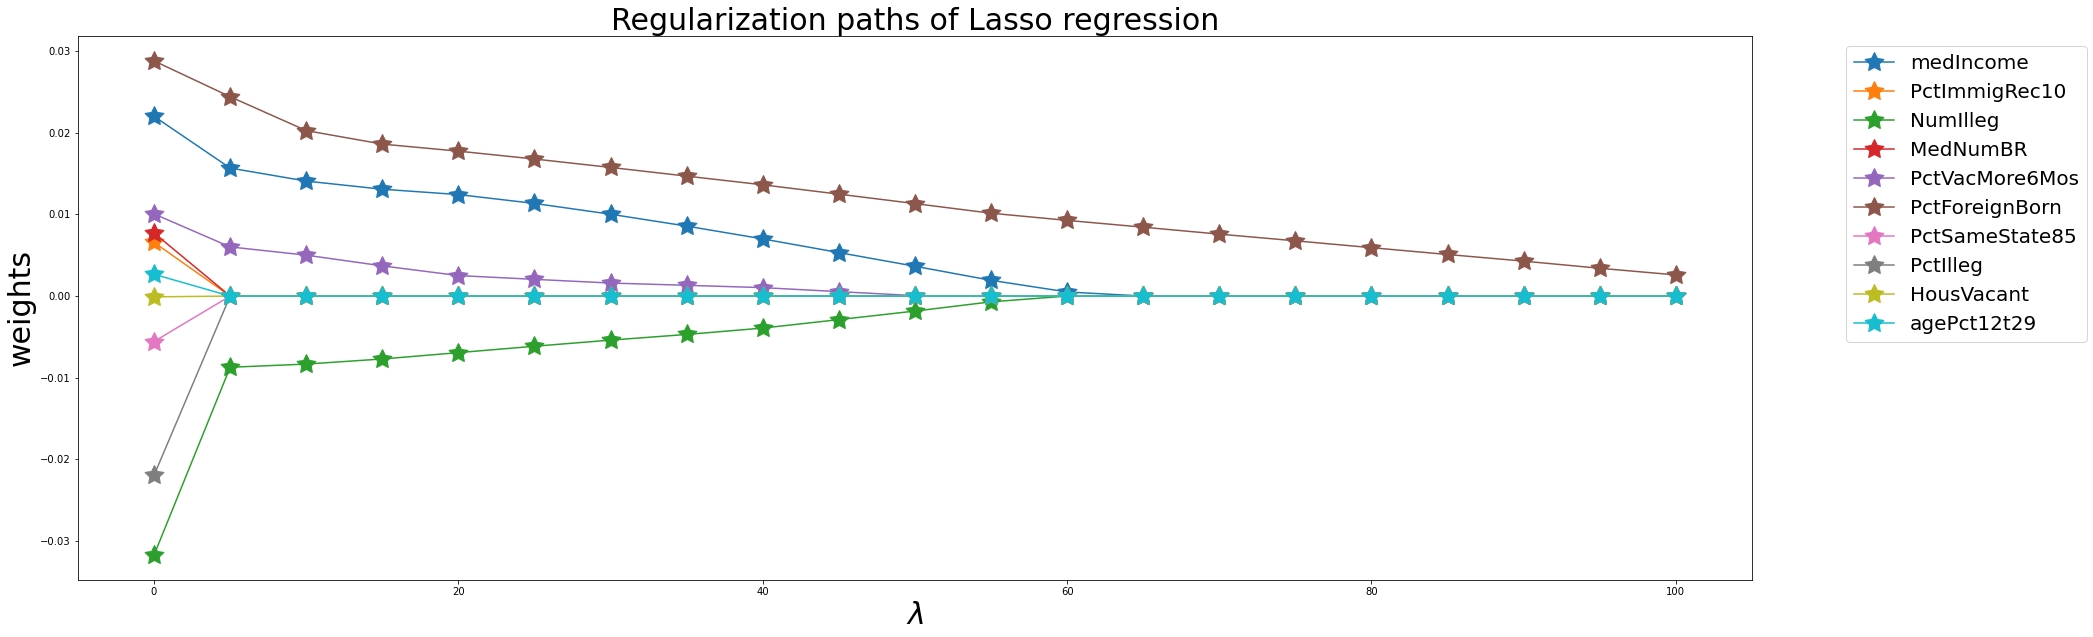

In [22]:
plot_regularization_paths(stacked_weight_lasso, lambda_list, 'Lasso', features)

The weight values are equal when lamba is 0. This is because regularization terms does not affect cost functions in both methods because lambda is 0. Therefore, they are both doing a linear regression without regularization.
<p>As lamba increases from 0, the regularization terms are making bigger and bigger effect in each cost functions. As a result, both regression methods tend to make smaller weights as lamba increases. We can see this from weights getting closer to the center(x-axis, y=0) as lamda increases in both figures above. </p>
<p>The difference is on whether the weights not only just get smaller but actually reach 0. In ridge regression, there are some points NEAR 0, but they all show different values. It means that they cannot be all 0. On the other hand. There are only 2 points left when lamda is 100 when Lasso Regression is used. This is because 9 out of 10 weigth coefficients became 0. As lambda gets bigger, more penalty was made from the penalty term, making weights smaller and smaller, and eventually making them 0 one by one. From this results, we can see that Lasso regression reduces features by making weights 0 but Ridge regression reduces the size of weights only (without making them 0).</p>
<p>Note that not all weights get smaller as lambda increases. In ridge regression, we can see that feature agePct12t29 increases when lambda increased from 0 to 5. This is because of correlation between weights. When total cost can decrease by reducing this one feature, the regression process increases this feature's weight. This is what happened for this weight.</p>

---

### P4.3

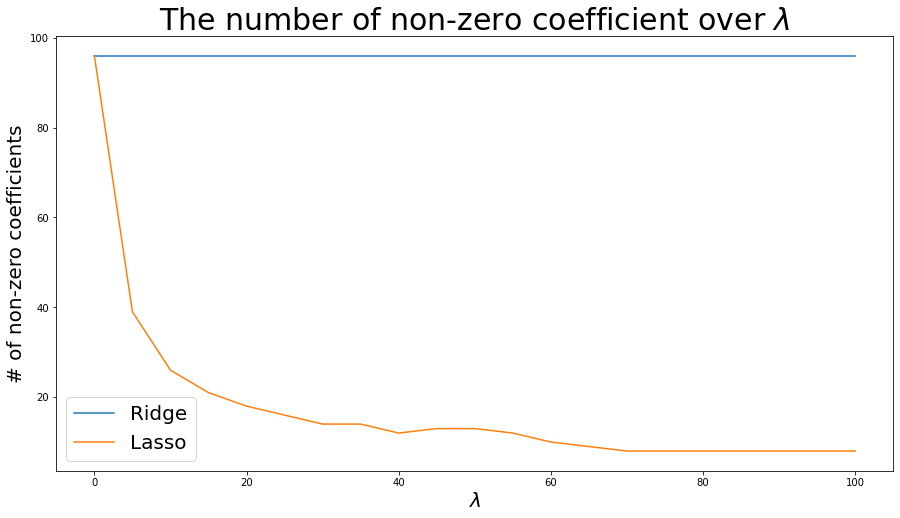

In [23]:
plt.figure(figsize=[15, 8])
plt.plot(lambda_list, get_number_of_non_zero(stacked_weight_ridge), label='Ridge')
plt.plot(lambda_list, get_number_of_non_zero(stacked_weight_lasso), label='Lasso')
plt.title(f"The number of non-zero coefficient over $\lambda$", fontsize=30)
plt.xlabel('$\lambda$', fontsize=20)
plt.ylabel('# of non-zero coefficients', fontsize=20, rotation=90)
plt.legend(fontsize=20)
plt.show()

As mentioned above, Lasso regression reduces the number of features by making weights to 0. We can see that as lambda increases from 0 to 100, the number of non-zero coefficients declines. This is because Lasso regression has a soft thresholding effect, which makes weights that are in certain range to 0. Therefore, the weights not only get smaller, but becomes 0 from some point. 
<p> In contrast, the number of non-zero coefficients from Ridge regression have a constant number - none of them are 0. This is because Ridge regression only makes weights smaller - it does not have any thresholding effect.</p>
<p>When we use Lasso Regression, we can reduce the number of features because we do not need neither data nor calculation for features that are assigned with 0 weight coefficient. Therefore, if we need to select some features, Lasso Regression can help this problem.</p>

---

### P4.5

In [24]:
training_errors_ridge = compute_errors(X, y, lambda_list, stacked_weight_ridge)
training_errors_lasso = compute_errors(X, y, lambda_list, stacked_weight_lasso)

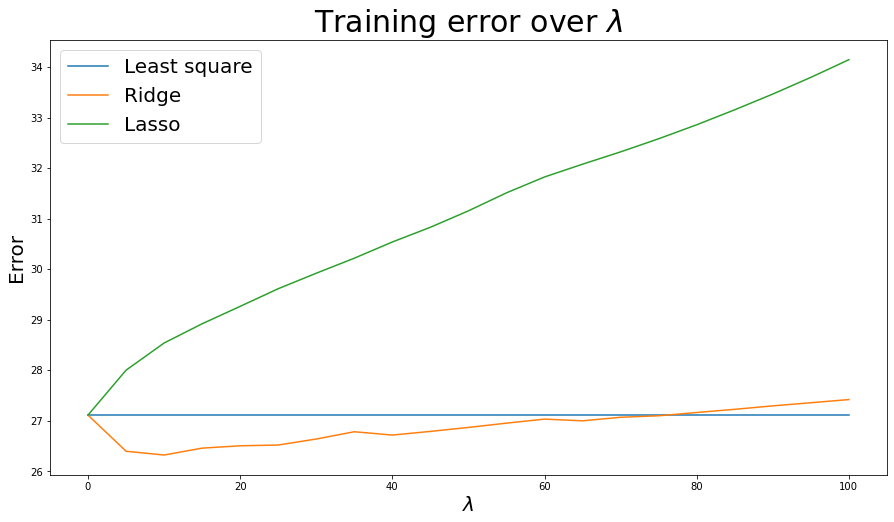

In [25]:
plt.figure(figsize=[15, 8])
plt.plot(lambda_list, [least_square.loss[-1]]*len(lambda_list), label='Least square')
plt.plot(lambda_list, training_errors_ridge, label='Ridge')
plt.plot(lambda_list, training_errors_lasso, label='Lasso')
plt.title(f"Training error over $\lambda$", fontsize=30)
plt.xlabel('$\lambda$', fontsize=20)
plt.ylabel('Error', fontsize=20, rotation=90)
plt.legend(fontsize=20)
plt.show()

We can see that training error tends to get larger as lambda increases. This is because penalty terms used in Ridge and Lasso regression bothers weights from fitting into the training data. The best answer is given by the least squares method. They may have some big weights so that they can fit to the trainng data. However, by adding penalty terms, both error and L1 or L2 norm are added to loss function. As a result, the models are made to consider L1 or L2 norm, instead of optimizing only to training error.
<p>The training error increases as lambda increases because bigger lamba makes L1 and L2 norm get a bigger proportion in loss function. When they have bigger proportions, regression process tries to consider more and more to L1 or L2 norm instead of training data(and training error). As a result, models with bigger lambda have bigger training error.</p>
<p>We can see that Ridge Regression can help the model train better to training data when small lambda is given.</p>
<p>Lasso Regression tends to give bigger training error compared to Ridge regression. This is because Lasso Regression loses features when bigger lamda is applied, compared to Ridge Regression only having smaller lambda. As a result, the model cannot train nor predict well enough because of the small number of features. This makes Lasso Regression produce bigger training error compared to Ridge Regression.</p>
<p>As a conclusion, both regression methods bother models from fitting exactly to the given training data, making a bigger training error. But as mentioned below, this may help in making good test errors by saving them from overfitting problems.(As we expect when using regularization terms)</p>

---

In [26]:
test_data_path = 'crime-test.csv'
test_dataset = Dataset(test_data_path)

   population  householdsize  agePct12t21  agePct12t29  agePct16t24  \
0       -0.14           0.35        -0.41        -0.10        -0.46   
1        0.02          -0.45        -0.22        -0.24        -0.40   
2       -0.45           0.28        -0.16         0.18        -0.46   
3        0.02          -0.27        -0.67        -0.51        -0.58   
4       -0.22           1.20         3.71         3.53         3.99   

   agePct65up  numbUrban  pctUrban  medIncome  pctWWage  ...  PctForeignBorn  \
0       -1.41      -0.11      0.48       1.43      1.70  ...           -0.24   
1       -0.19       0.12      0.68      -0.29      0.06  ...           -0.80   
2       -1.25      -0.34      0.68       0.14      1.54  ...           -0.67   
3       -0.69       0.12      0.68       0.95      0.67  ...            0.54   
4       -1.19      -0.11      0.68      -1.25      0.45  ...            0.54   

   PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  LandArea  \
0           

In [27]:
X_test, y_test = test_dataset.parse_data(features=test_dataset.features)
print(f"shape of X: {X_test.shape}, shape of y: {y_test.shape}")

shape of X: (399, 96), shape of y: (399,)


In [28]:
test_error_least_square = np.sum((y_test - X_test.dot(least_square.weight)) ** 2)
test_errors_ridge = compute_errors(X_test, y_test, lambda_list, stacked_weight_ridge)
test_errors_lasso = compute_errors(X_test, y_test, lambda_list, stacked_weight_lasso)

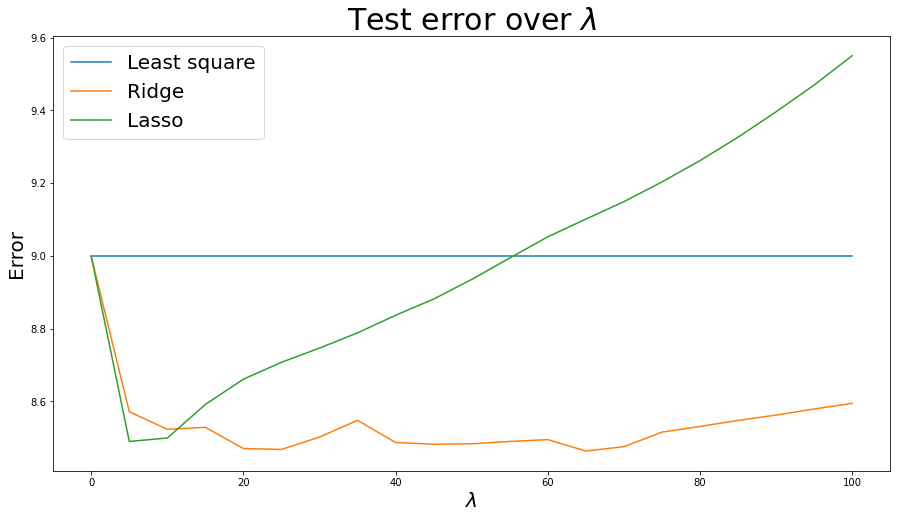

In [29]:
plt.figure(figsize=[15, 8])
plt.plot(lambda_list, [test_error_least_square]*len(lambda_list), label='Least square')
plt.plot(lambda_list, test_errors_ridge, label='Ridge')
plt.plot(lambda_list, test_errors_lasso, label='Lasso')
plt.title(f"Test error over $\lambda$", fontsize=30)
plt.xlabel('$\lambda$', fontsize=20)
plt.ylabel('Error', fontsize=20, rotation=90)
plt.legend(fontsize=20)
plt.show()

We saw that training error increases as lambda increases. On the other hand, test error decreases at first and increases then, making the minimum test error in non-zero lambda. This result shows that regularization term helps making models that give better results for test data.
<p>Recall that models have big coefficients when they are overfitted to training data. The solution here was to use regularization term that gives penalty when weights are big. This result shows that these penalty terms with small lambda helped model a better one. </p>
<p>Compared to training error which showed a bigger error compared to Least Square method with no regularization, test error here is smaller. This means that there WAS actually overfitting problem. By using regularization terms, the model solved the overfitting problem. </p>
<p>When we have bigger lambda, the test error got larger again. This is because the penalty term was too large that the model was not able to fit enough to the training data - underfitting occured. Therefore, this figure tells us that we need to find the best lambda that makes the model neither overfit nor underfit but just right.</p>
<p>We can see that Lasso Regression has a bigger overfitting problem compared to Ridge Regression. This is because Lasso Regression actually makes weights of some features to 0. From some point, too many features are lost and the model cannot give a good prediction. This leads to bigger test error compared to Ridge regression when bigger lambda is applied.</p>

---